In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install pycaret[full]

In [ ]:
# !pip install pycaret==2.3.0

In [ ]:
# !pip install pycaret[analysis]
# !pip install pycaret[models]
# !pip install pycaret[tuner]
# !pip install pycaret[mlops]
# !pip install pycaret[parallel]
# !pip install pycaret[test]

In [ ]:
# pip install streamlit

In [ ]:
# !pip install --upgrade packaging

In [ ]:
# check version
from pycaret.utils import version
version()

'3.0.2'

In [ ]:
import pycaret
dir(pycaret)

# Preprocesamiento Pycaret
https://pycaret.gitbook.io/docs/get-started/preprocessing

# Funciones de Pycaret
https://pycaret.gitbook.io/docs/get-started/functions

# MVP -- Basicos

## 1_MVP_Clasificación_Pycaret

### 1.0_Cargar el DataSet

In [ ]:
# load sample dataset
from pycaret.datasets import get_data
data = get_data('diabetes')

,Number of times pregnant,Plasma glucose concentration a 2 hours in an oral glucose tolerance test,Diastolic blood pressure (mm Hg),Triceps skin fold thickness (mm),2-Hour serum insulin (mu U/ml),Body mass index (weight in kg/(height in m)^2),Diabetes pedigree function,Age (years),Class variable
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
# # Cargar el conjunto de datos de ejemplo
# from pycaret.datasets import get_data

# # Guardar el dataframe en un archivo CSV
# data.to_csv('diabetes.csv', index=False)

#### Dividir el DataSet en Train y Test

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from pycaret.datasets import get_data

# Cargar el dataset de ejemplo
data2 = get_data('diabetes')

# Dividir el DataFrame en conjuntos de entrenamiento y prueba
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)

# Mostrar la cantidad de filas en cada conjunto
print("Filas en el conjunto de entrenamiento:", len(train_data))
print("Filas en el conjunto de prueba:", len(test_data))


,Number of times pregnant,Plasma glucose concentration a 2 hours in an oral glucose tolerance test,Diastolic blood pressure (mm Hg),Triceps skin fold thickness (mm),2-Hour serum insulin (mu U/ml),Body mass index (weight in kg/(height in m)^2),Diabetes pedigree function,Age (years),Class variable
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Filas en el conjunto de entrenamiento: 614
Filas en el conjunto de prueba: 154


In [ ]:
test_data.head(2)

,Number of times pregnant,Plasma glucose concentration a 2 hours in an oral glucose tolerance test,Diastolic blood pressure (mm Hg),Triceps skin fold thickness (mm),2-Hour serum insulin (mu U/ml),Body mass index (weight in kg/(height in m)^2),Diabetes pedigree function,Age (years),Class variable
668,6,98,58,33,190,34.0,0.430,43,0
324,2,112,75,32,0,35.7,0.148,21,0


### 1.1_Functional API

In [ ]:
# !pip install --upgrade packaging

In [ ]:
from pycaret.classification import * # Importar la función de clasificación de PyCaret:
s = setup(data, target = 'Class variable', session_id = 123) #Configuración del entorno de clasificación

# from pycaret.classification import ClassificationExperiment
# s = ClassificationExperiment()
# s.setup(data, target = 'Class variable', session_id = 123)

,Description,Value
0,Session id,123
1,Target,Class variable
2,Target type,Binary
3,Original data shape,"(768, 9)"
4,Transformed data shape,"(768, 9)"
5,Transformed train set shape,"(537, 9)"
6,Transformed test set shape,"(231, 9)"
7,Numeric features,8
8,Preprocess,True
9,Imputation type,simple


#### **Explicación Parametros de Setup functional API**
1. Session id: Este parámetro representa el identificador de sesión utilizado para establecer una semilla (seed) y garantizar la reproducibilidad de los resultados. En este caso, se establece en 123.
2. Target: Este parámetro especifica el nombre de la columna en los datos que contiene la variable objetivo que se desea predecir. En este caso, se utiliza 'Class variable' como nombre de la columna objetivo.
3. Target type: Este parámetro indica el tipo de variable objetivo. En este caso, se establece en 'Binary', lo que significa que la variable objetivo tiene dos posibles valores (por ejemplo, 0 o 1).
4. Original data shape: Este parámetro muestra la forma (número de filas y columnas) de los datos originales. En este caso, los datos originales tienen 768 filas y 9 columnas.
5. Transformed data shape: Este parámetro muestra la forma de los datos transformados después del preprocesamiento. En este caso, los datos transformados tienen la misma forma que los datos originales, es decir, 768 filas y 9 columnas.
6. Transformed train set shape: Este parámetro muestra la forma del conjunto de entrenamiento después de la transformación. En este caso, el conjunto de entrenamiento transformado tiene 537 filas y 9 columnas.
7. Transformed test set shape: Este parámetro muestra la forma del conjunto de prueba después de la transformación. En este caso, el conjunto de prueba transformado tiene 231 filas y 9 columnas.
8. Numeric features: Este parámetro indica la cantidad de características numéricas en los datos. En este caso, hay 8 características numéricas.
9. Preprocess: Este parámetro indica si se debe realizar el preprocesamiento de los datos. En este caso, se establece en True, lo que significa que se realizará el preprocesamiento.
10. Imputation type: Este parámetro indica el tipo de imputación utilizado para llenar los valores faltantes en los datos. En este caso, se utiliza la imputación simple.
11. Numeric imputation: Este parámetro indica el método de imputación utilizado para características numéricas. En este caso, se utiliza el promedio (mean) para imputar los valores faltantes en las características numéricas.
12. Categorical imputation: Este parámetro indica el método de imputación utilizado para características categóricas. En este caso, se utiliza la moda (mode) para imputar los valores faltantes en las características categóricas.
13. Fold Generator: Este parámetro indica el generador de pliegues utilizado para dividir los datos en conjuntos de entrenamiento y prueba en la validación cruzada. En este caso, se utiliza StratifiedKFold. (En resumen, StratifiedKFold es un método de validación cruzada que garantiza una distribución equitativa de clases en cada pliegue, lo que lo hace adecuado para conjuntos de datos con desequilibrio de clases)
14. Fold Number: Este parámetro indica el número de pliegues utilizados en la validación cruzada. En este caso, se utiliza 10 pliegues. En resumen, con "Fold Number" establecido en 10, se realiza una validación cruzada de 10 pliegues, lo que implica dividir el conjunto de datos en 10 partes y realizar 10 iteraciones de entrenamiento y evaluación del modelo.
15. CPU Jobs: Este parámetro indica el número de trabajos de CPU utilizados para procesar el análisis. En este caso, se establece en -1, lo que significa que se utilizarán todos los núcleos de CPU disponibles.
16. Use GPU: Este parámetro indica si se utilizará la GPU para acelerar el procesamiento. En este caso, se establece en False.
17. Log Experiment: Este parámetro indica si se debe realizar el registro del experimento. Si se establece en True, PyCaret registrará los detalles del experimento, incluyendo los hiperparámetros, métricas de rendimiento y otros resultados relevantes. En este caso, se establece en False, lo que significa que no se realizará el registro del experimento.
18. Experiment Name: Este parámetro se utiliza para asignar un nombre al experimento. Sirve para identificar y etiquetar un experimento específico en el registro. En este caso, se establece en 'clf-default-name' como nombre del experimento. Puedes cambiarlo a cualquier otro nombre descriptivo que desees utilizar.
19. USI: Este parámetro se refiere al Unique Session Identifier (Identificador de Sesión Único). Es una identificación única que se asigna al experimento y se utiliza para rastrear y distinguir diferentes ejecuciones o sesiones. En este caso, se establece en '0f4' como valor del USI

### 1.2_Compare Models - 16 Modelos
En este código, se está utilizando la API funcional de PyCaret para comparar modelos de aprendizaje automático.

La API funcional de PyCaret permite realizar tareas de aprendizaje automático utilizando una interfaz basada en funciones. En lugar de usar el enfoque tradicional de programación orientada a objetos, donde se crean objetos de modelos individuales, la API funcional de PyCaret permite realizar operaciones como la comparación de modelos utilizando funciones específicas.

En este caso, la función "compare_models()" se utiliza para comparar diferentes modelos de aprendizaje automático. Esta función realiza automáticamente una evaluación comparativa de varios modelos populares y devuelve el mejor modelo según una métrica de rendimiento específica.

Después de llamar a la función "compare_models()", el resultado se asigna a la variable "best". Esta variable contendrá el mejor modelo seleccionado por PyCaret en base a la comparación realizada.

En resumen, utilizando la API funcional de PyCaret, se está comparando modelos de aprendizaje automático llamando a la función "compare_models()" y guardando el mejor modelo resultante en la variable "best".

In [ ]:
# from IPython.display import display, HTML

In [ ]:
from IPython.display import display, HTML
# functional API
best = compare_models()

# # OOP API
# best = s.compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.7689,0.8047,0.5602,0.7208,0.6279,0.4641,0.4736,0.8660
ridge,Ridge Classifier,0.7670,0.0000,0.5497,0.7235,0.6221,0.4581,0.4690,0.0600
lda,Linear Discriminant Analysis,0.7670,0.8055,0.5550,0.7202,0.6243,0.4594,0.4695,0.0780
rf,Random Forest Classifier,0.7485,0.7911,0.5284,0.6811,0.5924,0.4150,0.4238,0.6170
nb,Naive Bayes,0.7427,0.7955,0.5702,0.6543,0.6043,0.4156,0.4215,0.0670
catboost,CatBoost Classifier,0.7410,0.7993,0.5278,0.6630,0.5851,0.4005,0.4078,3.5400
gbc,Gradient Boosting Classifier,0.7373,0.7917,0.5550,0.6445,0.5931,0.4013,0.4059,0.3690
ada,Ada Boost Classifier,0.7372,0.7799,0.5275,0.6585,0.5796,0.3926,0.4017,0.5480
et,Extra Trees Classifier,0.7299,0.7788,0.4965,0.6516,0.5596,0.3706,0.3802,0.4590
qda,Quadratic Discriminant Analysis,0.7282,0.7894,0.5281,0.6558,0.5736,0.3785,0.3910,0.1360


Processing:   0%|          | 0/69 [00:00<?, ?it/s]

#### Explicación Modelado y metricas

1. Logistic Regression (Regresión Logística): Es un modelo que utiliza una función matemática llamada regresión logística para predecir la probabilidad de pertenecer a una determinada categoría o clase.

2. Ridge Classifier (Clasificador Ridge): Es un modelo de clasificación que utiliza un enfoque de regularización llamado Ridge para predecir la clase de un dato.

3. Linear Discriminant Analysis (Análisis Discriminante Lineal): Es un modelo que busca encontrar la combinación lineal de características que maximice la separación entre diferentes clases.

4. Random Forest Classifier (Clasificador de Bosques Aleatorios): Es un modelo que utiliza múltiples árboles de decisión para realizar la clasificación. Cada árbol se entrena con una muestra aleatoria de características y datos.

5. Naive Bayes (Clasificador Naive Bayes): Es un modelo que se basa en el Teorema de Bayes para realizar la clasificación. Supone una independencia entre las características y calcula la probabilidad condicional de la clase dado un conjunto de características.

6. Gradient Boosting Classifier (Clasificador de Reforzamiento Gradual): Es un modelo que combina múltiples modelos débiles en forma de árboles de decisión para mejorar la precisión de las predicciones.

7. Ada Boost Classifier (Clasificador AdaBoost): Es un modelo que utiliza múltiples modelos débiles en forma de árboles de decisión para realizar la clasificación. Cada árbol se entrena dando más importancia a las instancias mal clasificadas por los árboles anteriores.

8. Extra Trees Classifier (Clasificador de Árboles Extra): Es un modelo que utiliza múltiples árboles de decisión entrenados con muestras aleatorias y utiliza promedios para realizar la clasificación.

9. Quadratic Discriminant Analysis (Análisis Discriminante Cuadrático): Es un modelo similar al Análisis Discriminante Lineal, pero permite suponer que las covarianzas de las diferentes clases son diferentes.

10. Light Gradient Boosting Machine (Máquina de Reforzamiento de Gradiente Ligero): Es un modelo similar al Gradient Boosting Classifier, pero utiliza una implementación más eficiente y rápida.

11. K Neighbors Classifier (Clasificador de Vecinos más Cercanos): Es un modelo que asigna la clase de un dato según las clases de sus vecinos más cercanos en el espacio de características.

12. Decision Tree Classifier (Clasificador de Árbol de Decisión): Es un modelo que construye un árbol de decisiones a partir de los datos de entrenamiento y realiza la clasificación según las reglas aprendidas.

13. Extreme Gradient Boosting (Refuerzo de Gradiente Extremo): Es un modelo que utiliza múltiples árboles de decisión en secuencia y realiza una optimización de gradiente para mejorar el rendimiento predictivo.

14. Dummy Classifier (Clasificador Ficticio): Es un modelo de clasificación que se utiliza como referencia para evaluar el rendimiento de otros modelos.

15. SVM - Linear Kernel: Es un modelo de Máquinas de Vectores de Soporte que utiliza un núcleo lineal para realizar la clasificación

-------------------------------

1. Accuracy (Exactitud): Es la proporción de predicciones correctas que hizo el modelo. En este caso, el modelo tiene una exactitud del 76.89%, lo que significa que acertó en aproximadamente el 76.89% de las predicciones.

2. AUC (Area Under the Curve): Es una medida que evalúa qué tan bien el modelo distingue entre las clases positivas y negativas. Cuanto más cercano a 1 sea el valor, mejor será el modelo para hacer esta distinción. En este caso, el modelo tiene un valor de AUC de 0.8047, lo que indica un buen rendimiento en la clasificación.

3. Recall (Recuperación): También conocido como sensibilidad, es la proporción de casos positivos que el modelo logró identificar correctamente. Un valor más alto indica que el modelo es bueno para encontrar los casos positivos. Aquí, el modelo tiene un valor de recuperación de 0.5602.

4. Precisión: Es la proporción de casos positivos que el modelo predijo correctamente en relación con todos los casos positivos que predijo. Cuanto más alto sea el valor, mejor será el modelo para predecir los casos positivos correctamente. En este caso, la precisión es de 0.7208.

5. F1: Es una medida que combina la precisión y la recuperación en un solo valor. Proporciona una evaluación general del rendimiento del modelo. Valores más altos indican un mejor rendimiento general. Aquí, el modelo tiene un valor de F1 de 0.6279.

6. Kappa: Es una medida que evalúa la concordancia entre las predicciones del modelo y los resultados reales, teniendo en cuenta la posibilidad de una concordancia aleatoria. Valores más altos indican una mayor concordancia. En este caso, el valor de kappa es de 0.4641.

7. MCC (Matthews Correlation Coefficient): Es una medida que combina la precisión, la recuperación y la concordancia en un solo valor. Cuanto más cercano a 1 sea el valor, mejor será el rendimiento del modelo. Aquí, el modelo tiene un valor de MCC de 0.4736.

8. TT (Sec): Es el tiempo de ejecución del modelo en segundos. Indica cuánto tiempo tomó para entrenar y evaluar el modelo

------------------
Kappa: El kappa es una medida que nos indica qué tan bien coincide el modelo con los resultados reales, teniendo en cuenta la posibilidad de que la coincidencia sea aleatoria. Un valor más alto de kappa significa que el modelo tiene una mayor concordancia con los resultados reales. En este caso, el valor de kappa es de 0.4641, lo cual indica que hay cierta concordancia entre las predicciones del modelo y los resultados reales, pero no es muy alta.

MCC (Coeficiente de Correlación de Matthews): El MCC es una medida que combina la precisión, la recuperación y la concordancia en una sola medida. Nos ayuda a evaluar el rendimiento general del modelo. Cuanto más cercano a 1 sea el valor de MCC, mejor será el rendimiento del modelo. En este caso, el modelo tiene un valor de MCC de 0.4736, lo cual indica un rendimiento moderado en general.

-----------------------

### 1.3_Seleccionar el Mejor Modelo


In [ ]:
print(best)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


### 1.4_Evalua el Modelo


In [ ]:
# functional API
evaluate_model(best)

# OOP API
# s.evaluate_model(best)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

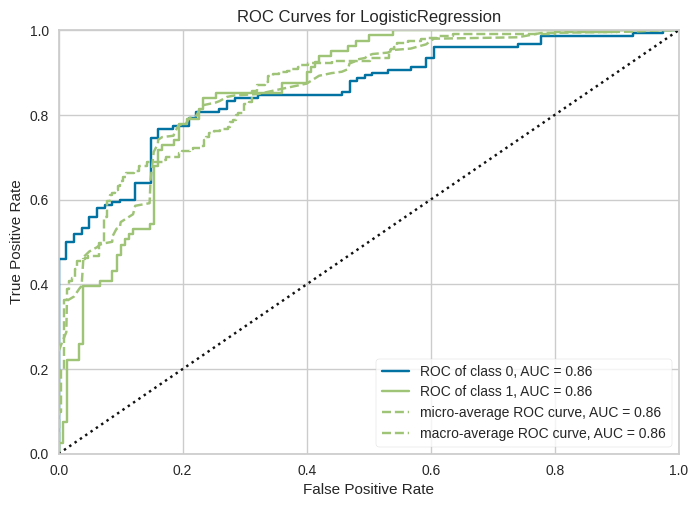

In [ ]:
# functional API
plot_model(best, plot = 'auc')

# # OOP API
# s.plot_model(best, plot = 'auc')

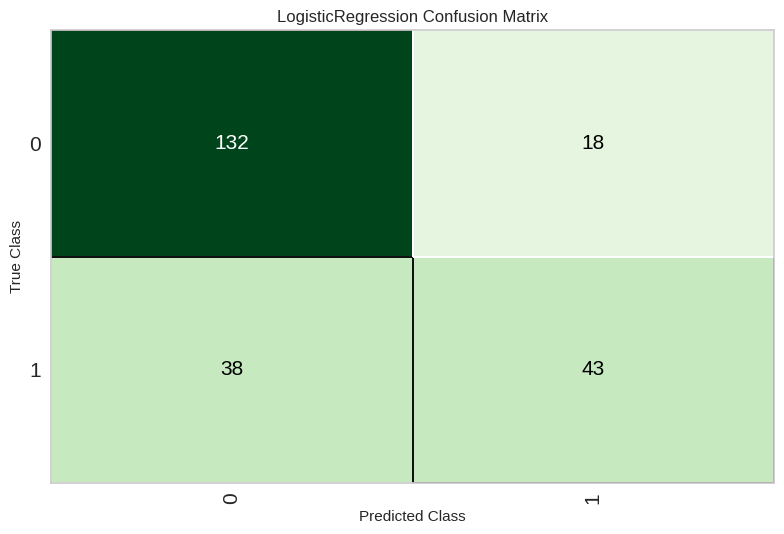

In [ ]:
# functional API
plot_model(best, plot = 'confusion_matrix')

# # OOP API
# s.plot_model(best, plot = 'confusion_matrix')

### 1.5_Predicciones CL


In [ ]:
# functional API
predict_model(best)

# # OOP API
# s.predict_model(best)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,0.7576,0.8568,0.5309,0.7049,0.6056,0.4356,0.4447


,Number of times pregnant,Plasma glucose concentration a 2 hours in an oral glucose tolerance test,Diastolic blood pressure (mm Hg),Triceps skin fold thickness (mm),2-Hour serum insulin (mu U/ml),Body mass index (weight in kg/(height in m)^2),Diabetes pedigree function,Age (years),Class variable,prediction_label,prediction_score
552,6,114,88,0,0,27.799999,0.247,66,0,0,0.8036
438,1,97,70,15,0,18.200001,0.147,21,0,0,0.9648
149,2,90,70,17,0,27.299999,0.085,22,0,0,0.9393
373,2,105,58,40,94,34.900002,0.225,25,0,0,0.7998
36,11,138,76,0,0,33.200001,0.420,35,0,1,0.6389
...,...,...,...,...,...,...,...,...,...,...,...
85,2,110,74,29,125,32.400002,0.698,27,0,0,0.8001
7,10,115,0,0,0,35.299999,0.134,29,0,1,0.6228
298,14,100,78,25,184,36.599998,0.412,46,1,0,0.5989
341,1,95,74,21,73,25.900000,0.673,36,0,0,0.9243


In [ ]:
# functional API
predictions = predict_model(best, data=data)
predictions.head()

# # OOP API
# predictions = s.predict_model(best, data=data)
# predictions.head()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,0.7773,0.8358,0.5709,0.7321,0.6415,0.4836,0.4915


,Number of times pregnant,Plasma glucose concentration a 2 hours in an oral glucose tolerance test,Diastolic blood pressure (mm Hg),Triceps skin fold thickness (mm),2-Hour serum insulin (mu U/ml),Body mass index (weight in kg/(height in m)^2),Diabetes pedigree function,Age (years),Class variable,prediction_label,prediction_score
0,6,148,72,35,0,33.599998,0.627,50,1,1,0.6939
1,1,85,66,29,0,26.600000,0.351,31,0,0,0.9418
2,8,183,64,0,0,23.299999,0.672,32,1,1,0.7974
3,1,89,66,23,94,28.100000,0.167,21,0,0,0.9453
4,0,137,40,35,168,43.099998,2.288,33,1,1,0.8395


In [ ]:
# functional API
predictions = predict_model(best, data=data, raw_score=True)
predictions.head()

# # OOP API
# predictions = s.predict_model(best, data=data, raw_score=True)
# predictions.head()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,0.7773,0.8358,0.5709,0.7321,0.6415,0.4836,0.4915


,Number of times pregnant,Plasma glucose concentration a 2 hours in an oral glucose tolerance test,Diastolic blood pressure (mm Hg),Triceps skin fold thickness (mm),2-Hour serum insulin (mu U/ml),Body mass index (weight in kg/(height in m)^2),Diabetes pedigree function,Age (years),Class variable,prediction_label,prediction_score_0,prediction_score_1
0,6,148,72,35,0,33.599998,0.627,50,1,1,0.3061,0.6939
1,1,85,66,29,0,26.600000,0.351,31,0,0,0.9418,0.0582
2,8,183,64,0,0,23.299999,0.672,32,1,1,0.2026,0.7974
3,1,89,66,23,94,28.100000,0.167,21,0,0,0.9453,0.0547
4,0,137,40,35,168,43.099998,2.288,33,1,1,0.1605,0.8395


### 1.6_Guardar_Modelo

In [ ]:
# functional API
save_model(best,'/content/drive/MyDrive/11_PROYECTOS/21_CD_Pycaret/my_best_pipeline') # CB
# save_model(best,'G:/Mi unidad/11_PROYECTOS/21_CD_Pycaret/my_best_pipeline') # Ruta VS
# G:\Mi unidad\11_PROYECTOS\21_CD_Pycaret
# # OOP API
# s.save_model(best, 'my_best_pipeline')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=FastMemory(location=/tmp/joblib),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['Number of times pregnant',
                                              'Plasma glucose concentration a 2 '
                                              'hours in an oral glucose '
                                              'tolerance test',
                                              'Diastolic blood pressure (mm Hg)',
                                              'Triceps skin fold thickness (mm)',
                                              '2-Hour serum insulin (mu U/ml)',
                                              'Body mass index (weight in '
                                              'kg/(height in m)^2)',
                                              'Diab...
                  TransformerWrapper(exclude=None, include=None,
                                     transformer=CleanCo

### 1.7_Cargar_modelo

In [ ]:
# functional API
# loaded_model = load_model('G:/Mi unidad/11_PROYECTOS/21_CD_Pycaret/my_best_pipeline') # vs
loaded_model = load_model('/content/drive/MyDrive/11_PROYECTOS/21_CD_Pycaret/my_best_pipeline') # CB
print(loaded_model)

Transformation Pipeline and Model Successfully Loaded
Pipeline(memory=FastMemory(location=/tmp/joblib),
         steps=[('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['Number of times pregnant',
                                             'Plasma glucose concentration a 2 '
                                             'hours in an oral glucose '
                                             'tolerance test',
                                             'Diastolic blood pressure (mm Hg)',
                                             'Triceps skin fold thickness (mm)',
                                             '2-Hour serum insulin (mu U/ml)',
                                             'Body mass index (weight in '
                                             'kg/(height in m)^2)',
                                             'Diab...
                 TransformerWrapper(exclude=None, include=None,
                

### 1.8_Predicciones_Nuevos_Datos

In [ ]:
import pandas as pd
from pycaret.classification import load_model

new_data=test_data
predictions = predict_model(loaded_model, data=new_data)
# Mostrar las predicciones
# print(predictions['Class variable'])
predictions.head(2)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,0.7727,0.8432,0.6364,0.7000,0.6667,0.4948,0.4961


,Number of times pregnant,Plasma glucose concentration a 2 hours in an oral glucose tolerance test,Diastolic blood pressure (mm Hg),Triceps skin fold thickness (mm),2-Hour serum insulin (mu U/ml),Body mass index (weight in kg/(height in m)^2),Diabetes pedigree function,Age (years),Class variable,prediction_label,prediction_score
668,6,98,58,33,190,34.000000,0.430,43,0,0,0.7815
324,2,112,75,32,0,35.700001,0.148,21,0,0,0.7704


### 1.8_Exportar los Resultados

In [ ]:
# Cargar el conjunto de datos de ejemplo
from pycaret.datasets import get_data

# Guardar el dataframe en un archivo CSV
predictions.to_csv('/content/drive/MyDrive/11_PROYECTOS/21_CD_Pycaret/Resultados_pred_Nuevos_Datos.csv', index=False) # CB

-----------------------------

## 2_Regresión

In [ ]:
# load sample dataset
from pycaret.datasets import get_data
data = get_data('insurance')

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
from pycaret.regression import *
s = setup(data, target = 'charges', session_id = 123)

,Description,Value
0,Session id,123
1,Target,charges
2,Target type,Regression
3,Original data shape,"(1338, 7)"
4,Transformed data shape,"(1338, 10)"
5,Transformed train set shape,"(936, 10)"
6,Transformed test set shape,"(402, 10)"
7,Ordinal features,2
8,Numeric features,3
9,Categorical features,3


In [ ]:
from pycaret.regression import RegressionExperiment
s = RegressionExperiment()
s.setup(data, target = 'charges', session_id = 123)

,Description,Value
0,Session id,123
1,Target,charges
2,Target type,Regression
3,Original data shape,"(1338, 7)"
4,Transformed data shape,"(1338, 10)"
5,Transformed train set shape,"(936, 10)"
6,Transformed test set shape,"(402, 10)"
7,Ordinal features,2
8,Numeric features,3
9,Categorical features,3


In [ ]:
# functional API
best = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,2701.9919,23548657.1177,4832.9329,0.8320,0.4447,0.3137,0.9360
rf,Random Forest Regressor,2771.4583,25416502.3827,5028.6343,0.8172,0.4690,0.3303,1.4470
catboost,CatBoost Regressor,2899.3783,25762701.9552,5057.5721,0.8163,0.4815,0.3522,1.9410
lightgbm,Light Gradient Boosting Machine,2992.1828,25521038.3331,5042.0978,0.8149,0.5378,0.3751,0.3530
et,Extra Trees Regressor,2833.3624,28427844.2412,5305.6516,0.7991,0.4877,0.3363,0.5970
ada,AdaBoost Regressor,4316.0568,29220505.6498,5398.4561,0.7903,0.6368,0.7394,0.2200
xgboost,Extreme Gradient Boosting,3443.6091,32824626.4000,5711.2140,0.7626,0.6224,0.4469,0.5270
lr,Linear Regression,4303.5559,38388058.4578,6176.5920,0.7306,0.5949,0.4433,1.2450
br,Bayesian Ridge,4311.2349,38391950.0874,6176.8896,0.7306,0.5910,0.4447,0.4410
llar,Lasso Least Angle Regression,4303.7694,38386824.2786,6176.4846,0.7306,0.5952,0.4434,0.3650


Processing:   0%|          | 0/85 [00:00<?, ?it/s]

#### Explicación Modelado y metricas


In [ ]:
print(best)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='squared_error',
                          max_depth=3, max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_samples_leaf=1,
                          min_samples_split=2, min_weight_fraction_leaf=0.0,
                          n_estimators=100, n_iter_no_change=None,
                          random_state=123, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)


In [ ]:
# functional API
evaluate_model(best)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

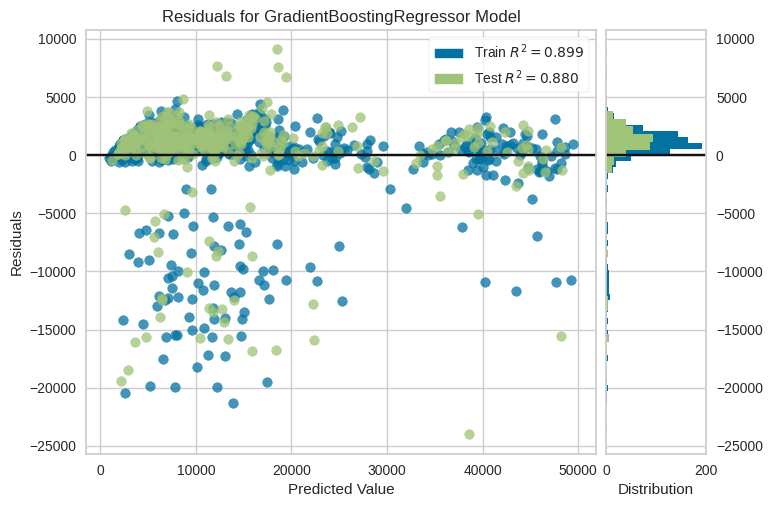

In [ ]:
#  functional API
plot_model(best, plot = 'residuals')

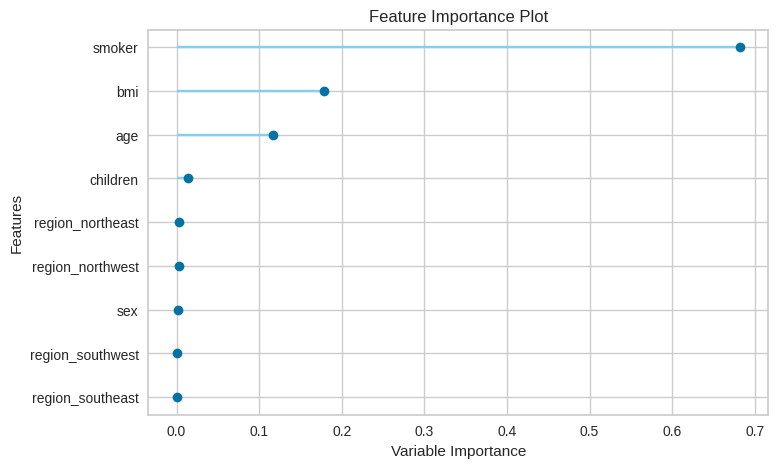

In [ ]:
# functional API
plot_model(best, plot = 'feature')

In [ ]:
# functional API
predict_model(best)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Gradient Boosting Regressor,2392.5661,17148355.3169,4141.0573,0.8800,0.3928,0.2875


,age,sex,bmi,children,smoker,region,charges,prediction_label
650,49,female,42.680000,2,no,southeast,9800.888672,10681.513104
319,32,male,37.334999,1,no,northeast,4667.607422,8043.453463
314,27,female,31.400000,0,yes,southwest,34838.871094,36153.097686
150,35,male,24.129999,1,no,northwest,5125.215820,7435.516853
336,60,male,25.740000,0,no,southeast,12142.578125,14676.544334
...,...,...,...,...,...,...,...,...
1221,40,male,24.969999,2,no,southeast,6593.508301,9264.152792
973,19,female,40.500000,0,no,southwest,1759.338013,2604.919960
1250,24,male,29.830000,0,yes,northeast,18648.421875,18639.490954
887,36,female,30.020000,0,no,northwest,5272.175781,5117.185514


### Predicciones RL

In [ ]:
# functional API
predictions = predict_model(best, data=data)
predictions.head()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Gradient Boosting Regressor,2219.8743,15663377.0613,3957.6985,0.8931,0.3650,0.2634


,age,sex,bmi,children,smoker,region,charges,prediction_label
0,19,female,27.900000,0,yes,southwest,16884.923828,18464.334448
1,18,male,33.770000,1,no,southeast,1725.552246,4020.345384
2,28,male,33.000000,3,no,southeast,4449.461914,6555.388388
3,33,male,22.705000,0,no,northwest,21984.470703,9627.045725
4,32,male,28.879999,0,no,northwest,3866.855225,3325.531292


### Guardar el Modelo

In [ ]:
# functional API
save_model(best, '/content/drive/MyDrive/11_PROYECTOS/21_CD_Pycaret/RL_pipeline')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=FastMemory(location=/tmp/joblib),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['age', 'bmi', 'children'],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=None,
                                                               keep_empty_features=False,
                                                               missing_values=nan,
                                                               strategy='mean',
                                                               verbose='deprecated'))),
                 ('categorical_imputer',
                  TransformerWrapper(exclude=N...
                                            criterion='friedman_mse', init=None,
                                   

### Cargar el Modelo

In [ ]:
# functional API
loaded_model = load_model('/content/drive/MyDrive/11_PROYECTOS/21_CD_Pycaret/RL_pipeline')
print(loaded_model)

Transformation Pipeline and Model Successfully Loaded
Pipeline(memory=FastMemory(location=/tmp/joblib),
         steps=[('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['age', 'bmi', 'children'],
                                    transformer=SimpleImputer(add_indicator=False,
                                                              copy=True,
                                                              fill_value=None,
                                                              keep_empty_features=False,
                                                              missing_values=nan,
                                                              strategy='mean',
                                                              verbose='deprecated'))),
                ('categorical_imputer',
                 TransformerWrapper(exclude=N...
                                           criterion='friedman_mse', init=N

### Predicción_Nuevos_Datos

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from pycaret.datasets import get_data

# Cargar el dataset de ejemplo
data2 = get_data('insurance')

# Dividir el DataFrame en conjuntos de entrenamiento y prueba
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)

# Mostrar la cantidad de filas en cada conjunto
print("Filas en el conjunto de entrenamiento:", len(train_data))
print("Filas en el conjunto de prueba:", len(test_data))

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


Filas en el conjunto de entrenamiento: 1070
Filas en el conjunto de prueba: 268


In [ ]:
import pandas as pd
from pycaret.regression import load_model

new_data=test_data

# Realizar predicciones en los nuevos datos
predictions = predict_model(loaded_model, data=new_data)

predictions.head(2)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Gradient Boosting Regressor,2127.6868,14459197.3909,3802.5251,0.9069,0.3581,0.2636


,age,sex,bmi,children,smoker,region,charges,prediction_label
764,45,female,25.174999,2,no,northeast,9095.068359,11092.433150
887,36,female,30.020000,0,no,northwest,5272.175781,5117.185514


## 3_Clusterización

In [ ]:
# load sample dataset
from pycaret.datasets import get_data
data = get_data('jewellery')

,Age,Income,SpendingScore,Savings
0,58,77769,0.791329,6559.829923
1,59,81799,0.791082,5417.661426
2,62,74751,0.702657,9258.992965
3,59,74373,0.765680,7346.334504
4,87,17760,0.348778,16869.507130


### Functional API

In [ ]:
from pycaret.clustering import *
s = setup(data, normalize = True)

,Description,Value
0,Session id,5133
1,Original data shape,"(505, 4)"
2,Transformed data shape,"(505, 4)"
3,Numeric features,4
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,Normalize,True
9,Normalize method,zscore


In [ ]:
from pycaret.clustering import ClusteringExperiment
s = ClusteringExperiment()
s.setup(data, normalize = True)

,Description,Value
0,Session id,7302
1,Original data shape,"(505, 4)"
2,Transformed data shape,"(505, 4)"
3,Numeric features,4
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,Normalize,True
9,Normalize method,zscore


In [ ]:
# functional API
kmeans = create_model('kmeans')

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.7581,1611.2647,0.3743,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

In [ ]:
print(kmeans)

KMeans(algorithm='lloyd', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init='warn', random_state=5133, tol=0.0001, verbose=0)


In [ ]:
# functional API
evaluate_model(kmeans)
# OOP API
# s.evaluate_model(kmeans)

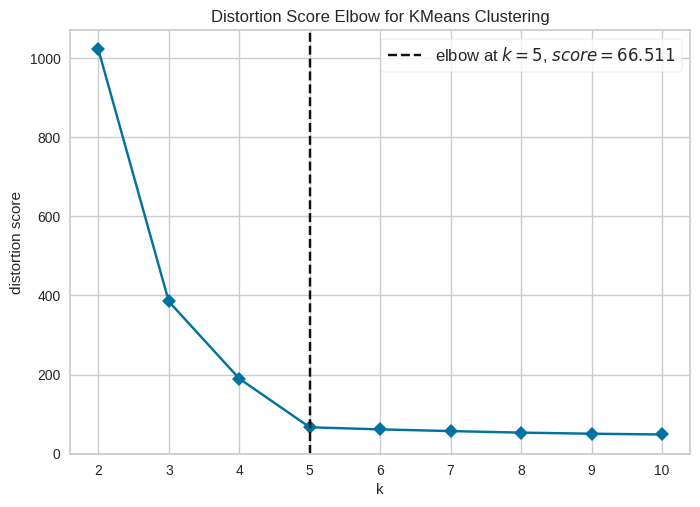

In [ ]:
# functional API
plot_model(kmeans, plot = 'elbow')

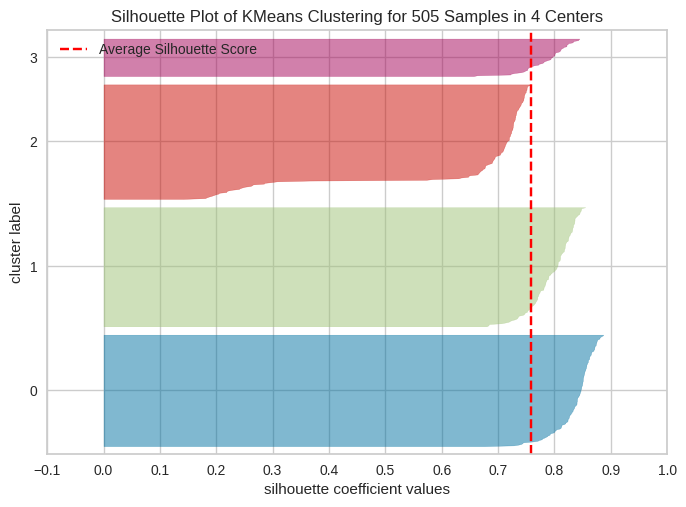

In [ ]:
# functional API
plot_model(kmeans, plot = 'silhouette')

In [ ]:
# functional API
result = assign_model(kmeans)
result.head()

,Age,Income,SpendingScore,Savings,Cluster
0,58,77769,0.791329,6559.830078,Cluster 1
1,59,81799,0.791082,5417.661621,Cluster 1
2,62,74751,0.702657,9258.993164,Cluster 1
3,59,74373,0.765680,7346.334473,Cluster 1
4,87,17760,0.348778,16869.507812,Cluster 0


### Predicciones CL

In [ ]:
# functional API
predictions = predict_model(kmeans, data = data)
predictions.head()

,Age,Income,SpendingScore,Savings,Cluster
0,-0.042287,0.062733,1.103593,-1.072467,Cluster 1
1,-0.000821,0.174811,1.102641,-1.303473,Cluster 1
2,0.123577,-0.021200,0.761727,-0.526556,Cluster 1
3,-0.000821,-0.031712,1.004705,-0.913395,Cluster 1
4,1.160228,-1.606165,-0.602619,1.012686,Cluster 0


### Guardar y cargar el modelo CL

In [ ]:
# functional API
save_model(kmeans, 'kmeans_pipeline')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=FastMemory(location=/tmp/joblib),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['Age', 'Income', 'SpendingScore',
                                              'Savings'],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=None,
                                                               keep_empty_features=False,
                                                               missing_values=nan,
                                                               strategy='mean',
                                                               verbose='deprecated'))),
                 ('categorical_imputer',
                  Transforme...
                                                               missin

In [ ]:
# functional API
loaded_model = load_model('kmeans_pipeline')
print(loaded_model)

Transformation Pipeline and Model Successfully Loaded
Pipeline(memory=FastMemory(location=/tmp/joblib),
         steps=[('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['Age', 'Income', 'SpendingScore',
                                             'Savings'],
                                    transformer=SimpleImputer(add_indicator=False,
                                                              copy=True,
                                                              fill_value=None,
                                                              keep_empty_features=False,
                                                              missing_values=nan,
                                                              strategy='mean',
                                                              verbose='deprecated'))),
                ('categorical_imputer',
                 Transforme...
                             

## 4_Detección_Anomalias

### Cargar los datos

In [ ]:
# load sample dataset
from pycaret.datasets import get_data
data = get_data('anomaly')

,Col1,Col2,Col3,Col4,Col5,Col6,Col7,Col8,Col9,Col10
0,0.263995,0.764929,0.138424,0.935242,0.605867,0.518790,0.912225,0.608234,0.723782,0.733591
1,0.546092,0.653975,0.065575,0.227772,0.845269,0.837066,0.272379,0.331679,0.429297,0.367422
2,0.336714,0.538842,0.192801,0.553563,0.074515,0.332993,0.365792,0.861309,0.899017,0.088600
3,0.092108,0.995017,0.014465,0.176371,0.241530,0.514724,0.562208,0.158963,0.073715,0.208463
4,0.325261,0.805968,0.957033,0.331665,0.307923,0.355315,0.501899,0.558449,0.885169,0.182754


### Functional API

In [ ]:
from pycaret.anomaly import *
s = setup(data, session_id = 123)

,Description,Value
0,Session id,123
1,Original data shape,"(1000, 10)"
2,Transformed data shape,"(1000, 10)"
3,Numeric features,10
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,CPU Jobs,-1
9,Use GPU,False


In [ ]:
from pycaret.anomaly import AnomalyExperiment
s = AnomalyExperiment()
s.setup(data, session_id = 123)

,Description,Value
0,Session id,123
1,Original data shape,"(1000, 10)"
2,Transformed data shape,"(1000, 10)"
3,Numeric features,10
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,CPU Jobs,-1
9,Use GPU,False


### Creación del Modelo
This function trains an unsupervised anomaly detection model. All the available models can be accessed using the models function.

In [ ]:
# functional API
iforest = create_model('iforest')
print(iforest)

Processing:   0%|          | 0/3 [00:00<?, ?it/s]

IForest(behaviour='new', bootstrap=False, contamination=0.05,
    max_features=1.0, max_samples='auto', n_estimators=100, n_jobs=-1,
    random_state=123, verbose=0)


In [ ]:
# functional API
models()

,Name,Reference
ID,,
abod,Angle-base Outlier Detection,pyod.models.abod.ABOD
cluster,Clustering-Based Local Outlier,pyod.models.cblof.CBLOF
cof,Connectivity-Based Local Outlier,pyod.models.cof.COF
iforest,Isolation Forest,pyod.models.iforest.IForest
histogram,Histogram-based Outlier Detection,pyod.models.hbos.HBOS
knn,K-Nearest Neighbors Detector,pyod.models.knn.KNN
lof,Local Outlier Factor,pyod.models.lof.LOF
svm,One-class SVM detector,pyod.models.ocsvm.OCSVM
pca,Principal Component Analysis,pyod.models.pca.PCA


In [ ]:
# functional API
plot_model(iforest, plot = 'tsne')

In [ ]:
# functional API
plot_model(iforest, plot = 'umap')

### Asignar Modelo
Esta función asigna etiquetas de anomalía al conjunto de datos para un modelo determinado. (1 = valor atípico, 0 = valor interior).

In [ ]:
# functional API
result = assign_model(iforest)
result.head()

,Col1,Col2,Col3,Col4,Col5,Col6,Col7,Col8,Col9,Col10,Anomaly,Anomaly_Score
0,0.263995,0.764929,0.138424,0.935242,0.605867,0.518790,0.912225,0.608234,0.723782,0.733591,0,-0.035865
1,0.546092,0.653975,0.065575,0.227772,0.845269,0.837066,0.272379,0.331679,0.429297,0.367422,0,-0.084927
2,0.336714,0.538842,0.192801,0.553563,0.074515,0.332993,0.365792,0.861309,0.899017,0.088600,1,0.025356
3,0.092108,0.995017,0.014465,0.176371,0.241530,0.514724,0.562208,0.158963,0.073715,0.208463,1,0.042415
4,0.325261,0.805968,0.957033,0.331665,0.307923,0.355315,0.501899,0.558449,0.885169,0.182754,0,-0.023408


### Predicciones

In [ ]:
# functional API
predictions = predict_model(iforest, data = data)
predictions.head()

,Col1,Col2,Col3,Col4,Col5,Col6,Col7,Col8,Col9,Col10,Anomaly,Anomaly_Score
0,0.263995,0.764929,0.138424,0.935242,0.605867,0.518790,0.912225,0.608234,0.723782,0.733591,0,-0.035865
1,0.546092,0.653975,0.065575,0.227772,0.845269,0.837066,0.272379,0.331679,0.429297,0.367422,0,-0.084927
2,0.336714,0.538842,0.192801,0.553563,0.074515,0.332993,0.365792,0.861309,0.899017,0.088600,1,0.025356
3,0.092108,0.995017,0.014465,0.176371,0.241530,0.514724,0.562208,0.158963,0.073715,0.208463,1,0.042415
4,0.325261,0.805968,0.957033,0.331665,0.307923,0.355315,0.501899,0.558449,0.885169,0.182754,0,-0.023408


### Guardar y Cargar Modelo

In [ ]:
# functional API
save_model(iforest, 'iforest_pipeline')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=FastMemory(location=/tmp/joblib),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['Col1', 'Col2', 'Col3', 'Col4',
                                              'Col5', 'Col6', 'Col7', 'Col8',
                                              'Col9', 'Col10'],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=None,
                                                               keep_empty_features=False,
                                                               missing_values=nan,
                                                               strategy='mean',
                                                               verbose='deprecated'))),
                 ('c...
                  TransformerWrapper

In [ ]:
# functional API
loaded_model = load_model('iforest_pipeline')
print(loaded_model)

Transformation Pipeline and Model Successfully Loaded
Pipeline(memory=FastMemory(location=/tmp/joblib),
         steps=[('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['Col1', 'Col2', 'Col3', 'Col4',
                                             'Col5', 'Col6', 'Col7', 'Col8',
                                             'Col9', 'Col10'],
                                    transformer=SimpleImputer(add_indicator=False,
                                                              copy=True,
                                                              fill_value=None,
                                                              keep_empty_features=False,
                                                              missing_values=nan,
                                                              strategy='mean',
                                                              verbose='deprecated'))),
                ('c

## 5_Series_Tiempo
El módulo PyCaret Time Series es una poderosa herramienta para analizar y predecir datos de series temporales utilizando aprendizaje automático y técnicas estadísticas clásicas. Este módulo permite a los usuarios realizar fácilmente tareas complejas de pronóstico de series temporales al automatizar todo el proceso, desde la preparación de datos hasta la implementación del modelo.
El módulo PyCaret Time Series Forecasting admite una amplia gama de métodos de pronóstico, como ARIMA, Prophet y LSTM. También proporciona varias funciones para manejar valores faltantes, descomposición de series temporales y visualizaciones de datos. 

### Cargar Datos

In [ ]:
# load sample dataset
from pycaret.datasets import get_data
data = get_data('airline')

Period
1949-01    112.0
1949-02    118.0
1949-03    132.0
1949-04    129.0
1949-05    121.0
Freq: M, Name: Number of airline passengers, dtype: float64

### Functional API

In [ ]:
# fh: Especifica el horizonte de pronóstico, es decir, cuántos pasos 
# hacia adelante se desea predecir en la serie de tiempo. En este caso, 
# se establece en 3, lo que significa que se pronosticarán los siguientes 
# 3 pasos en la serie de tiempo.

# fold: Especifica el número de pliegues o divisiones que se utilizarán para 
# la validación cruzada. La validación cruzada se utiliza para evaluar el 
# rendimiento del modelo en conjuntos de datos diferentes. En este caso, se 
# establece en 5, lo que significa que se utilizarán 5 pliegues para la 
# validación cruzada.

from pycaret.time_series import *
s = setup(data, fh = 3, fold = 5, session_id = 123)

,Description,Value
0,session_id,123
1,Target,Number of airline passengers
2,Approach,Univariate
3,Exogenous Variables,Not Present
4,Original data shape,"(144, 1)"
5,Transformed data shape,"(144, 1)"
6,Transformed train set shape,"(141, 1)"
7,Transformed test set shape,"(3, 1)"
8,Rows with missing values,0.0%
9,Fold Generator,ExpandingWindowSplitter


#### Explicación de cada parametro
1. session_id: Es un identificador único para la sesión actual. Se utiliza para reproducir los resultados exactos en ejecuciones posteriores del mismo código.

2. Target: Es la variable objetivo que se está pronosticando. En este caso, representa el número de pasajeros de aerolíneas.

3. Approach: Indica si el análisis de series de tiempo es univariado (solo una variable) o multivariado (más de una variable). Aquí se indica que es univariado.

4. Exogenous Variables: Indica si hay variables exógenas (variables adicionales que pueden influir en la serie de tiempo). En este caso, no hay variables exógenas presentes.

5. Original data shape: Muestra la forma o dimensiones del conjunto de datos original. En este caso, los datos tienen 144 filas y 1 columna.

6. Transformed data shape: Muestra la forma o dimensiones del conjunto de datos transformado. En este caso, los datos tienen 144 filas y 1 columna, lo que indica que no hubo cambios en la forma después de la transformación.

7. Transformed train set shape: Muestra la forma o dimensiones del conjunto de datos de entrenamiento transformado. En este caso, los datos de entrenamiento tienen 141 filas y 1 columna.

8. Transformed test set shape: Muestra la forma o dimensiones del conjunto de datos de prueba transformado. En este caso, los datos de prueba tienen 3 filas y 1 columna.

9. Rows with missing values: Indica el porcentaje de filas en los datos que tienen valores faltantes. En este caso, no hay filas con valores faltantes, por lo que el valor es 0.0%.

10. Fold Generator: Especifica el método utilizado para generar los pliegues o divisiones en la validación cruzada. En este caso, se utiliza el método "ExpandingWindowSplitter".

11. Fold Number: Indica el número de pliegue actual en la validación cruzada. En este caso, se está utilizando el pliegue número 5.

12. Enforce Prediction Interval: Indica si se debe aplicar un intervalo de predicción. En este caso, se establece en "False", lo que significa que no se está aplicando un intervalo de predicción.

13. Splits used for hyperparameters: Indica qué divisiones se utilizan para ajustar los hiperparámetros del modelo. Aquí se indica que se utilizan todas las divisiones.

14. User Defined Seasonal Period(s): Permite al usuario especificar periodos estacionales definidos manualmente. En este caso, no se han definido periodos estacionales manualmente.

15. Ignore Seasonality Test: Indica si se debe ignorar la detección automática de estacionalidad. Aquí se establece en "False", lo que significa que no se ignora la detección automática de estacionalidad.

16. Seasonality Detection Algo: Especifica el algoritmo utilizado para detectar la estacionalidad en la serie de tiempo. En este caso, se utiliza el algoritmo "auto" para detectar automáticamente la estacionalidad.

17. Max Period to Consider: Indica el período máximo considerado para la detección de estacionalidad. En este caso, se establece en 60.

18. Seasonal Period(s) Tested: Muestra los periodos estacionales probados en la detección automática de estacionalidad. En este caso, se han probado los periodos 12, 24, 36, 11 y 48.

19. Significant Seasonal Period(s): Indica los periodos estacionales significativos encontrados en la serie de tiempo. Aquí se encontraron los periodos 12, 24, 36, 11 y 48 como significativos.

20. Significant Seasonal Period(s) without Harmonics: Indica los periodos estacionales significativos encontrados en la serie de tiempo sin considerar armónicos. En este caso, los periodos significativos sin armónicos son 48, 36 y 11.

21. Remove Harmonics: Indica si se deben eliminar los armónicos de los periodos estacionales. Aquí se establece en "False", lo que significa que no se eliminan los armónicos.

22. Harmonics Order Method: Especifica el método utilizado para determinar el orden de los armónicos. En este caso, se utiliza el método "harmonic_max".

23. Num Seasonalities to Use: Indica el número de estacionalidades utilizadas en el análisis. En este caso, se utiliza 1 estacionalidad.

24. All Seasonalities to Use: Muestra todas las estacionalidades utilizadas en el análisis. En este caso, se utiliza la estacionalidad 12.

25. Primary Seasonality: Indica la estacionalidad primaria utilizada en el análisis. En este caso, la estacionalidad primaria es 12.

26. Seasonality Present: Indica si se ha detectado la presencia de estacionalidad en la serie de tiempo. Aquí se establece en "True", lo que significa que se ha detectado la presencia de estacionalidad.

27. Seasonality Type: Indica el tipo de estacionalidad encontrada en la serie de tiempo. Aquí se indica que es de tipo "multiplicativo".

28. Target Strictly Positive: Indica si la variable objetivo es estrictamente positiva. Aquí se establece en "True", lo que significa que la variable objetivo debe ser estrictamente positiva.

29. Target White Noise: Indica si la variable objetivo sigue un proceso de ruido blanco. En este caso, se indica que no sigue un proceso de ruido blanco.

30. Recommended d: Es el número recomendado de diferenciaciones para lograr la estacionariedad en la serie de tiempo.

31. Recommended Seasonal D: Es el número recomendado de diferenciaciones estacionales para lograr la estacionariedad en la serie de tiempo.

32. Preprocess: Indica si se debe realizar un preprocesamiento adicional en los datos. Aquí se establece en "False", lo que significa que no se realiza un preprocesamiento adicional.

33. CPU Jobs: Indica el número de trabajos de CPU que se pueden ejecutar en paralelo. En este caso, se establece en -1, lo que significa que se utilizarán todos los núcleos de la CPU disponibles.

34. Use GPU: Indica si se debe utilizar la GPU para acelerar el procesamiento. Aquí se establece en "False", lo que significa que no se utiliza la GPU.

35. Log Experiment: Indica si se debe registrar el experimento en un archivo de registro. Aquí se




### Seleccionar el mejor Modelo

In [ ]:
# functional API
best = compare_models()

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,18:47:13
Status,. . . . . . . . . . . . . . . . . .,Fitting 5 Folds
Estimator,. . . . . . . . . . . . . . . . . .,Auto ARIMA


,Model,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2,TT (Sec)
arima,ARIMA,0.6480,0.6501,19.5728,22.3027,0.0412,0.0420,-0.0796,0.2700
snaive,Seasonal Naive Forecaster,1.7700,1.5999,53.5333,54.9143,0.1136,0.1211,-4.1630,0.0700
naive,Naive Forecaster,1.8145,1.7444,54.8667,59.8160,0.1135,0.1151,-3.7710,0.5360
polytrend,Polynomial Trend Forecaster,2.3154,2.2507,70.1138,77.3400,0.1363,0.1468,-4.6202,0.0600
grand_means,Grand Means Forecaster,7.1261,6.3506,216.0214,218.4259,0.4377,0.5682,-59.2684,0.0680


Processing:   0%|          | 0/121 [00:00<?, ?it/s]

,Model,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2,TT (Sec)
stlf,STLF,0.4240,0.4429,12.8002,15.1933,0.0266,0.0268,0.4296,0.0420
exp_smooth,Exponential Smoothing,0.5063,0.5378,15.2893,18.4452,0.0334,0.0335,-0.0519,1.0580
ets,ETS,0.5519,0.5801,16.6135,19.8369,0.0354,0.0357,-0.0740,0.2500
arima,ARIMA,0.6480,0.6501,19.5728,22.3027,0.0412,0.0420,-0.0796,0.2700
auto_arima,Auto ARIMA,0.6524,0.6297,19.7331,21.6102,0.0414,0.0420,-0.0554,48.8800
theta,Theta Forecaster,0.8458,0.8223,25.7024,28.3332,0.0524,0.0541,-0.7710,0.0500
huber_cds_dt,Huber w/ Cond. Deseasonalize & Detrending,0.9002,0.8900,27.2568,30.5782,0.0550,0.0572,-0.0309,0.2720
knn_cds_dt,K Neighbors w/ Cond. Deseasonalize & Detrending,0.9381,0.8830,28.5678,30.5007,0.0555,0.0575,0.0908,0.5300
lr_cds_dt,Linear w/ Cond. Deseasonalize & Detrending,0.9469,0.9297,28.6337,31.9163,0.0581,0.0605,-0.1620,0.7620
ridge_cds_dt,Ridge w/ Cond. Deseasonalize & Detrending,0.9469,0.9297,28.6340,31.9164,0.0581,0.0605,-0.1620,0.4420


In [ ]:
# OOP API
# best = s.compare_models()

### Analizar el modelo

In [ ]:
# functional API
plot_model(best, plot = 'forecast', data_kwargs = {'fh' : 24})

In [ ]:
# functional API
plot_model(best, plot = 'diagnostics')

In [71]:
# functional API
plot_model(best, plot = 'insample')

### Predicciones

In [72]:
# functional API
final_best = finalize_model(best)
predict_model(best, fh = 24)

,y_pred
1960-10,455.2909
1960-11,406.4324
1960-12,441.5140
1961-01,456.2386
1961-02,430.1439
1961-03,471.7323
1961-04,490.5395
1961-05,507.2320
1961-06,567.3178
1961-07,650.9920


### Guardar modelo

In [ ]:
# functional API
save_model(final_best, 'my_final_best_model')

Transformation Pipeline and Model Successfully Saved


(ForecastingPipeline(steps=[('forecaster',
                             TransformedTargetForecaster(steps=[('model',
                                                                 ForecastingPipeline(steps=[('forecaster',
                                                                                             TransformedTargetForecaster(steps=[('model',
                                                                                                                                 STLForecaster(forecaster_resid=None,
                                                                                                                                               forecaster_seasonal=None,
                                                                                                                                               forecaster_trend=None,
                                                                                                                                         

### Cargar Modelo

In [ ]:
# functional API
loaded_model = load_model('my_final_best_model')
print(loaded_model)

Transformation Pipeline and Model Successfully Loaded
ForecastingPipeline(steps=[('forecaster',
                            TransformedTargetForecaster(steps=[('model',
                                                                ForecastingPipeline(steps=[('forecaster',
                                                                                            TransformedTargetForecaster(steps=[('model',
                                                                                                                                STLForecaster(forecaster_resid=None,
                                                                                                                                              forecaster_seasonal=None,
                                                                                                                                              forecaster_trend=None,
                                                                                          

------------------------------------------

# MVP -- Avanzado

1. Binary Classification:
[texto del enlace](https://colab.research.google.com/drive/11tvVsvrpF54WP9fuS4wCUv8c4gzroKmB)

2. Multiclass Classification:
[texto del enlace](https://colab.research.google.com/drive/13AvExBihp6sjN95xXa34Qcw1krgHa6qg)

3. Regression:
[texto del enlace](https://colab.research.google.com/drive/1cYk_jz-gvOVJe3BfaWYRrsMdfdXC2dQ9)

4. Time Series Forecasting:
[texto del enlace](https://colab.research.google.com/drive/1OaFcB6sjA_Rv-ljpiSJYoa3sAVNsfOpY)

5. Clustering:
[texto del enlace](https://colab.research.google.com/drive/1kJDiy-h-en2NCvJChtXeGiFf9_4HdIYw)

6. Anomaly Detection:
[texto del enlace](https://colab.research.google.com/drive/1GWH5TINDrGcvLyy1-z2t2G_TDlog5S56)